In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn import datasets
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import model_selection
from sklearn import neighbors
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from rulefit import RuleFit
import pickle
from sklearn.ensemble import ExtraTreesRegressor
from tabulate import tabulate
from xgboost import XGBRegressor
from xgboost import plot_importance


a=["date", "Day","Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
b=["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
c=["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]
d=["Appliances"]
df = pd.read_csv("energydata_complete.csv",usecols=a)
df2=  pd.read_csv("energydata_complete.csv",usecols=b)
df1 = df[['date','Day']]
data = df[['Appliances','lights','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9','T_out','Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',"Tdewpoint",'rv1', 'rv2' ]]
scaler = MinMaxScaler()
scaler.fit(data)
#print()
#print(scaler.data_max_)
data_trans = scaler.transform(data)
df2.loc[:,:]=data_trans
df2.head()
df = pd.concat([df1, df2], axis=1)
df.head()
del a[0]
del a[0]
df["date1"]= ((df['date'].str.split(" ").str[0]))
df.head()

y=df['Appliances']
X=df[["lights","T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


C:\Users\Shilpu\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:38:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.170742


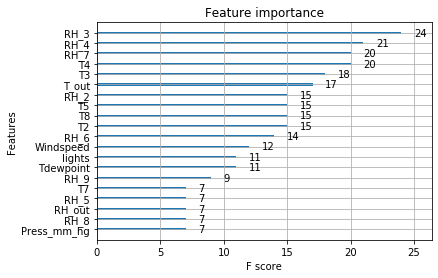

Based on Feature Selection and Feature Correlation, the top 20 features selected for building the models are:
T4","T3","T2","RH_3","RH_7","T_out","RH_9","RH_4","RH_6","T8","Windspeed","RH_2","T5","lights","RH_5","Tdewpoint","RH_8","Press_mm_hg","RH_out"


In [5]:
plot_importance(xg_reg,max_num_features=20)
plt.show()
print ("Based on Feature Selection and Feature Correlation, the top 20 features selected for building the models are:")
print ('T4","T3","T2","RH_3","RH_7","T_out","RH_9","RH_4","RH_6","T8","Windspeed","RH_2","T5","lights","RH_5","Tdewpoint","RH_8","Press_mm_hg","RH_out"')

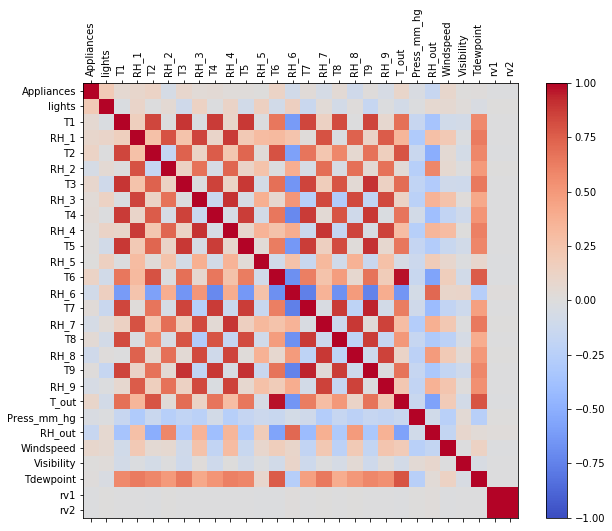

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [2]:
y=df['Appliances']
X=df[["T4","T3","T2","RH_3","RH_7","T_out","RH_9","RH_4","RH_6","T8","Windspeed","RH_2","T5","lights","RH_5","Tdewpoint","RH_8","Press_mm_hg","RH_out"]]

R-Squared Value: 0.12
MAE: 0.05174441662210737
MSE: 0.008355528398649866
RMSE: 0.09140857945865839


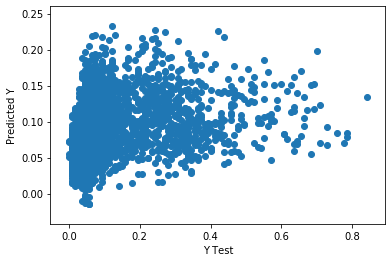

R-Squared Value: 0.07
MAE: 0.05068668600058709
MSE: 0.008034965716670337
RMSE: 0.08963797028419562


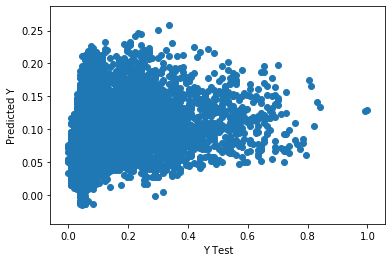

R-Squared Value: 0.12
MAE: 0.05068668600058709
MSE: 0.008034965716670337
RMSE: 0.08963797028419562


Text(0, 0.5, 'Predicted Y')

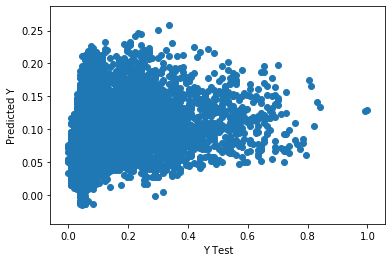

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R-Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R-Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = LinearRegression()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R-Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

R Squared Value: 1.00
MAE: 0.08408334959741769
MSE: 0.010452875677181412
RMSE: 0.1022393059306518


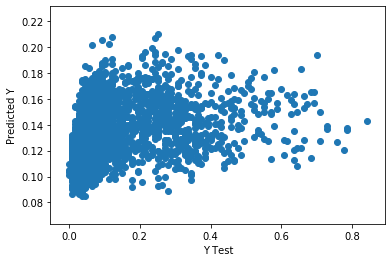

R Squared Value: -0.17
MAE: 0.08340970478970619
MSE: 0.010226064506350798
RMSE: 0.10112400558893421


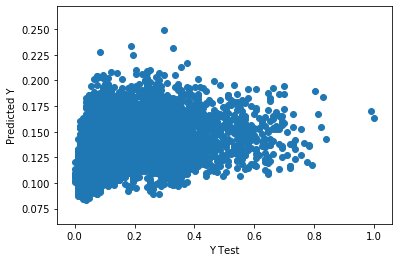

R Squared Value: -0.12
MAE: 0.08340970478970619
MSE: 0.010226064506350798
RMSE: 0.10112400558893421


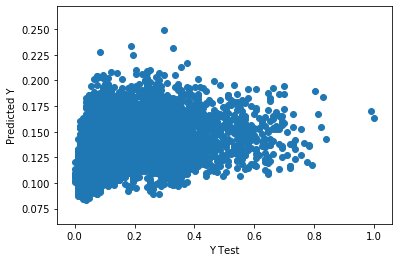

In [4]:
#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, predictions)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = SVR(kernel='rbf')
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = SVR(kernel='rbf')
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.16
MAE: 0.038352324294803695
MSE: 0.007976571130919055
RMSE: 0.08931165170860438


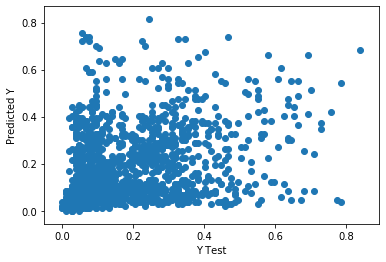

R Squared Value: -2.33
MAE: 0.011506668971346983
MSE: 0.002393173431272953
RMSE: 0.04892007186496104


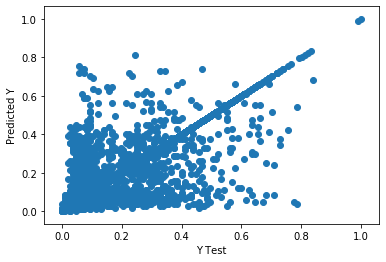

R Squared Value: 0.09
MAE: 0.011506668971346983
MSE: 0.002393173431272953
RMSE: 0.04892007186496104


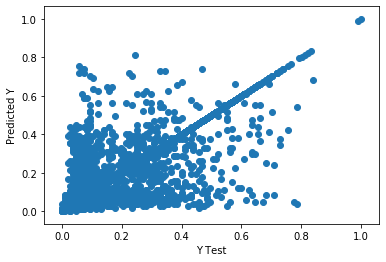

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#Printing the model
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = DecisionTreeRegressor()
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = DecisionTreeRegressor()
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

RMSE value for k=  1 is: 0.08113455525874542
RMSE value for k=  2 is: 0.07106310588103133
RMSE value for k=  3 is: 0.07141102073412961
RMSE value for k=  4 is: 0.07184866523760276
RMSE value for k=  5 is: 0.07307235580790715
RMSE value for k=  6 is: 0.07329850579904612
RMSE value for k=  7 is: 0.07435595627871351
RMSE value for k=  8 is: 0.07509634951088386
RMSE value for k=  9 is: 0.0754689608967995
RMSE value for k=  10 is: 0.07615496421792424
RMSE value for k=  11 is: 0.07662523992050213
RMSE value for k=  12 is: 0.07692881837962434
RMSE value for k=  13 is: 0.07727695973424488
RMSE value for k=  14 is: 0.07759341240053623
RMSE value for k=  15 is: 0.07788641143690901
RMSE value for k=  16 is: 0.07809615834129308
RMSE value for k=  17 is: 0.07834566496866119
RMSE value for k=  18 is: 0.07861251654854547
RMSE value for k=  19 is: 0.07890281648434716
RMSE value for k=  20 is: 0.07927277029422165


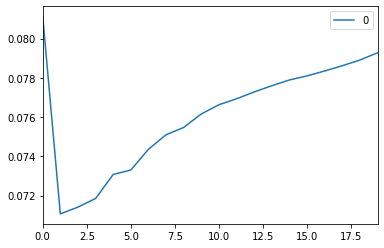

In [6]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

R Squared Value: 0.46
MAE: 0.03231173062140615
MSE: 0.005099533882290288
RMSE: 0.07141102073412961


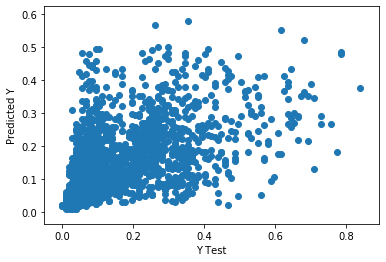

R Squared Value: -0.69
MAE: 0.023494795132073178
MSE: 0.002984682474311889
RMSE: 0.05463224756782288


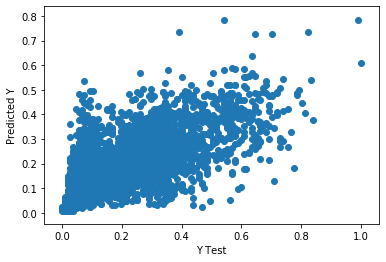

R Squared Value: 0.44
MAE: 0.023494795132073178
MSE: 0.002984682474311889
RMSE: 0.05463224756782288


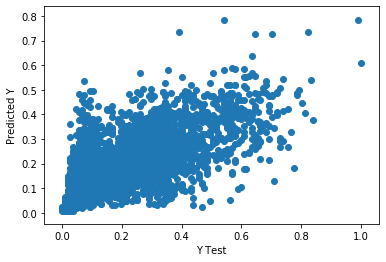

In [7]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = neighbors.KNeighborsRegressor(n_neighbors = 3)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = neighbors.KNeighborsRegressor(n_neighbors = 5)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


R Squared Value: 0.23
MAE: 0.04632164494214565
MSE: 0.007320118048215323
RMSE: 0.08555768842258026


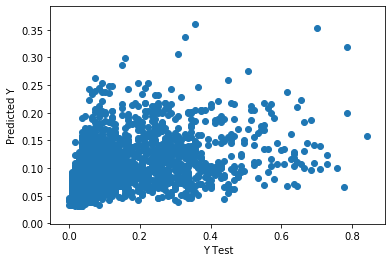

R Squared Value: -0.03
MAE: 0.043493061195502815
MSE: 0.006359898157669551
RMSE: 0.0797489696339053


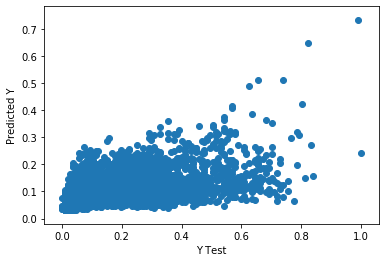

R Squared Value: 0.25
MAE: 0.043493061195502815
MSE: 0.006359898157669551
RMSE: 0.0797489696339053


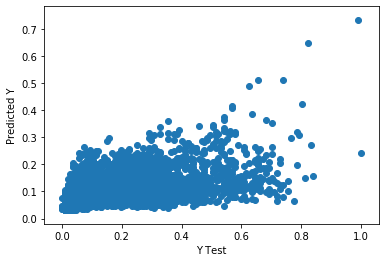

In [8]:
params={'n_estimators':500,'max_depth':4,'min_samples_split':2,
        'learning_rate':0.01,'loss':'ls'}

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.GradientBoostingRegressor(**params)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.GradientBoostingRegressor(**params)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.51
MAE: 0.03241823258574345
MSE: 0.0046384090342330014
RMSE: 0.06810586637164967


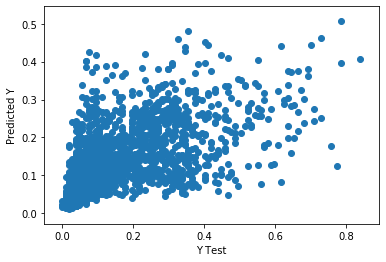

R Squared Value: -0.36
MAE: 0.0177433678482889
MSE: 0.001809227463843521
RMSE: 0.04253501456263441


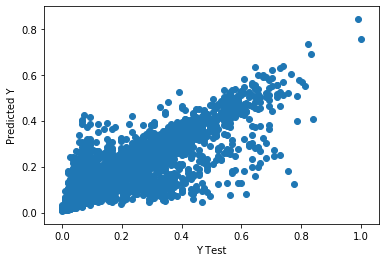

R Squared Value: 0.51
MAE: 0.0177433678482889
MSE: 0.001809227463843521
RMSE: 0.04253501456263441


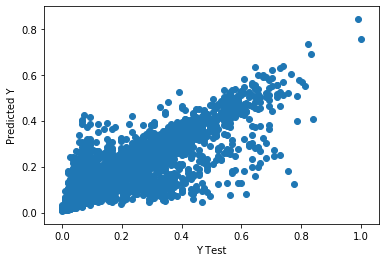

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = ensemble.BaggingRegressor(n_estimators=500,random_state=234,n_jobs=4)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

R Squared Value: 0.51
MAE: 0.032584386004511114
MSE: 0.004694642507399632
RMSE: 0.06851746133212783


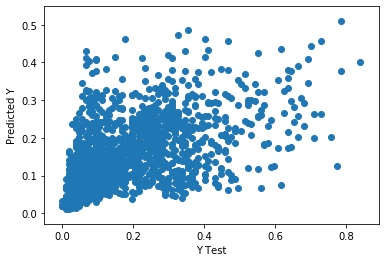

R Squared Value: -0.37
MAE: 0.01805653885951474
MSE: 0.0018567363429711301
RMSE: 0.043089863575684825


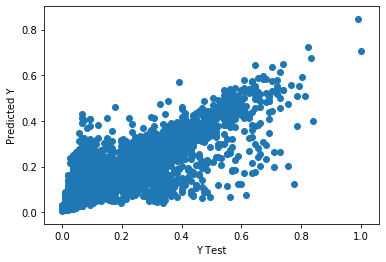

R Squared Value: 0.51
MAE: 0.01805653885951474
MSE: 0.0018567363429711301
RMSE: 0.043089863575684825


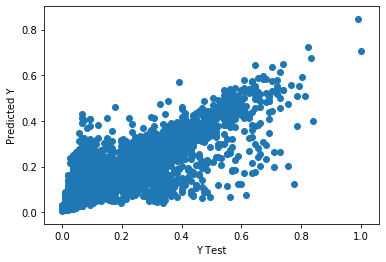

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
model=RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = model.score(X_test, y_test)
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using K fold cross validation
kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("R Squared Value: %.2f" % (results_kfold.mean())) 
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#Validation using Repeated Random Test Train Split
kfold2 = model_selection.ShuffleSplit(n_splits=10, test_size=0.30, random_state=100)
model_shufflecv = RandomForestRegressor(n_estimators = 100, random_state = 0)
results_4 = model_selection.cross_val_score(model_shufflecv, X, y, cv=kfold2)
print("R Squared Value: %.2f" % (results_4.mean()))
predictions = model.predict(X)
print('MAE:', metrics.mean_absolute_error(y, predictions))
print('MSE:', metrics.mean_squared_error(y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

#Printing the model
plt.scatter(y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [13]:
y=df['Appliances'].values
X=df[["lights","RH_1","T3","RH_3","RH_5","T6","RH_6","T7","T8","Press_mm_hg","Windspeed","Visibility","Tdewpoint"]].values

#Validation using Train test split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=100)
rf = RuleFit()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values("support", ascending=False)
print(rules)

C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shilpu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


                                                   rule    type      coef  \
3                                             feature_3  linear -0.024443   
7                                             feature_7  linear -0.052503   
8                                             feature_8  linear  0.055235   
9                                             feature_9  linear -0.019544   
6                                             feature_6  linear  0.055909   
485                     feature_8 <= 0.9362221360206604    rule -0.007524   
782   feature_0 <= 0.7142857313156128 & feature_7 <=...    rule -0.032474   
812   feature_10 > 0.0535714291036129 & feature_9 <=...    rule -0.021316   
175   feature_1 > 0.08636821806430817 & feature_10 <...    rule  0.004437   
1158                  feature_12 > 0.046832580119371414    rule  0.003766   
202   feature_7 > 0.02547387033700943 & feature_3 <=...    rule  0.002276   
1414  feature_1 <= 0.6645812392234802 & feature_9 > ...    rule -0.019861   

R Squared Value: 0.51
MAE: 0.04670782960021643
MSE: 0.007171753374193106
RMSE: 0.08468620533589344


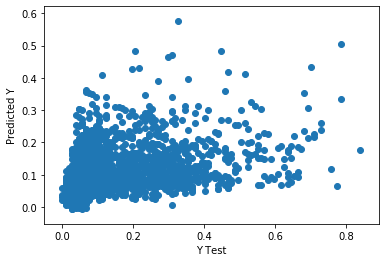

In [14]:
print("R Squared Value: %.2f" % (result))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()